<a href="https://colab.research.google.com/github/SyedAnasAli3/Machine-Learning-Projects/blob/main/Classifying_german_road_traffic_signs_using_a_modified_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
from keras.utils.np_utils import to_categorical
import pickle
import random
import pandas as pd
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

 

 
%matplotlib inline

In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)  
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

print(type(train_data))
X_train, y_train = train_data['features'], train_data['labels']  
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']    

<class 'dict'>


**with** is used whenever you wish to execute two operastions as a pair and invoke a block of code in between. We ll open a file, manipulate it and then with will automatically close the file for us.
'rb' -> means reading in binary format.
train_data -> dictonary-> train_data['features'] are the values of training images in pixel representation, train_data['labels'] are the values of labels,

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3."

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

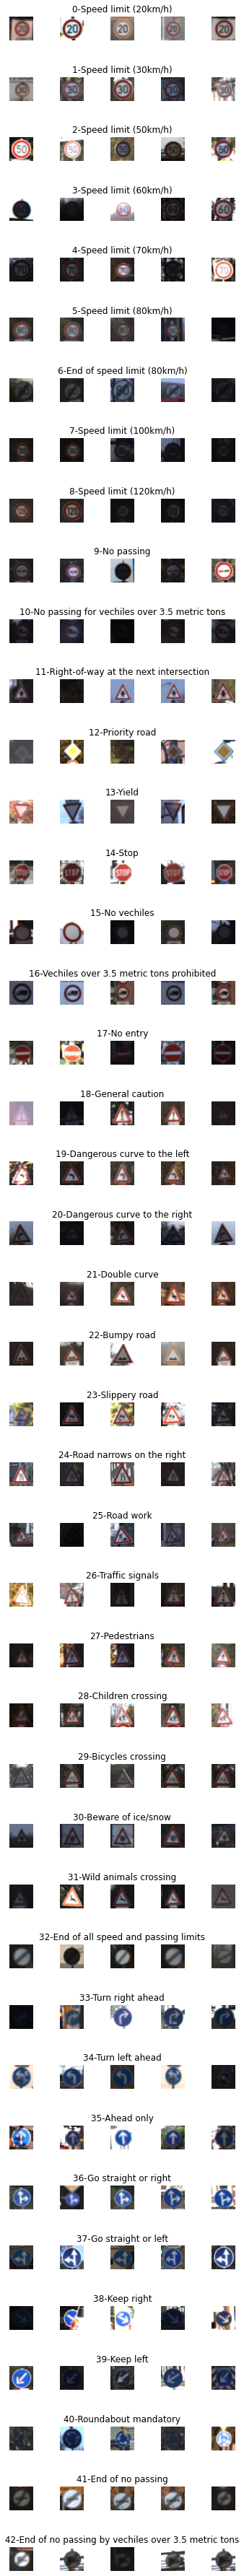

In [ ]:
num_of_samples = []
num_classes = 43
num_cols = 5

fig, axs = plt.subplots(nrows=num_classes, ncols=num_cols, figsize=(5, 50))
fig.tight_layout()

for i in range(num_cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1) , :, :], cmap = plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + "-" + row["SignName"])
      num_of_samples.append(len(x_selected))
       #(Index, Series)


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


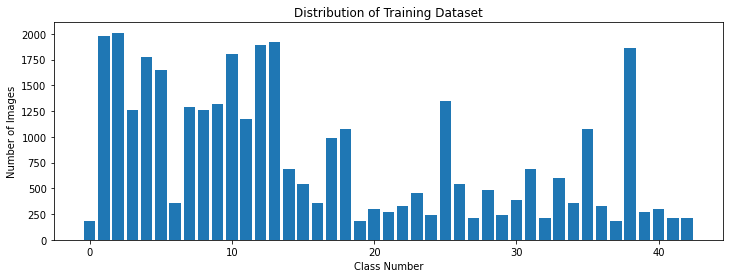

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of Training Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

(32, 32, 3)
36


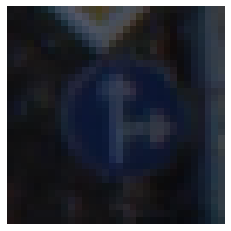

In [ ]:
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [ ]:
import cv2

(32, 32)


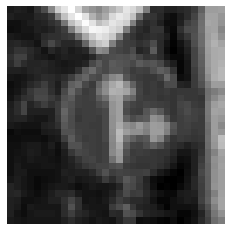

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(img.shape)

function to convert our img to gray scale.

(-0.5, 31.5, 31.5, -0.5)

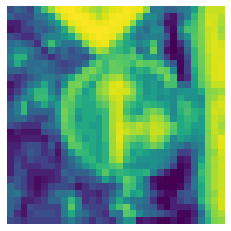

In [ ]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")

Histogram equalization: function

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

map()-> iterate through the entire array and for every element of the array that it loops through, it returns a new element based on the specified function thats executed for each item in the array.map()-> returns the elements as a list Ultimately creating a new array with updated values in the form of an array. so we can store the return values in the list() and then pass it into np.array() to format it as an array of images.
Hence we preprocess our entire data.

(34799, 32, 32)


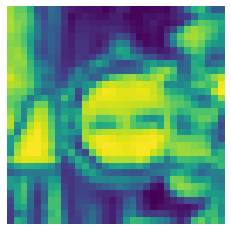

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

adding depth to our data for convolutional networks to run.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
datagen.fit(X_train)

1) import ImageDataGenerator from keras preprocessing image library.
the ImageDataGenerator will allow us to define the types of transformations we wanna make to our data sets and allows to set range limits for how extreme these transformations can get. 5 transformations are:width_shift_range, height_shift_range, zoom_range, shear_range, rotation_range.

1) & 2)width_shift_range & height_shift_range- {horizontal or vertical translation respectively leading to off centered images(helps our model to adpat to images which aren't centered properly)range will be either a decimal which implies % of shift or in terms of integers which refers to pixel shift}.
3) zoom_range- takes a float value x b/w 0 and 1 => maxzoom= 1+x(viz0.2) and minzoom=1-x(viz0.2).
4) shear is the angle with which image is shifted in an amount proportional to its signed distance from the line that is parallel to that direction and goes through the origin. viz. the angle wrt x axis or y axis. can be seen in either ways. we only use a small magnitude of shear shift so we use 0.1.
5) rotation rotates the image by a certain int value(here10) of degrees.


datagen.fit(data) is imp cz it allows the image generator to calculate any statistics reqd. for performing these transformations. most intresting thing is this img data generator is an iterator which only returns batches of transformed images when requested. datagen doesn't perform operations on all the images in our datasets as that would be v. memory intensive. it only creates these newly augmented images in real time when requested. This reduces the overall memory reqmnts. but increases time cost during the training process as that is when these data will be created.


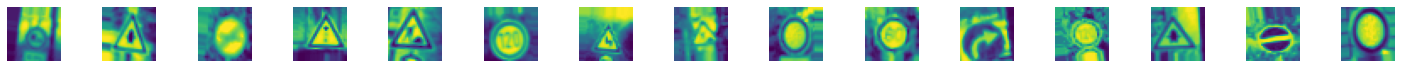

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)
# print(X_batch.shape) ->(20, 32, 32, 1)
fig, axs = plt.subplots(1, 15, figsize=(20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

plotting 15 images using for loop:axs[i].imshow(X_batch[i].reshape(32, 32))->reshped for better viewing.


Starting the process flowing of augmented data from the generator in the batches(iterator object) of 20. 
next()-> command is a built in python command which simply calls an iterator item and retrives the next item for it. so we get 20 new images **arrays here cz its input is X_train which is also an array** each time the next function is called on the iterator. 

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43) #43classes
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

one-hot encode.

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu' ) )
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2) ))

  model.add(Conv2D(30, (3, 3), activation='relu' ))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2) ))
  # model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.001), loss ='categorical_crossentropy', metrics=['accuracy'])
  return model


for optimization (increasing the accuracies) we first decrease the lr  to 0.001. Secondly we increase the no. of filters in the convolution layers from 30 & 15 to 60 & 30. And then to further increase accuracy thereby also dealing with the overfitting we change our leNet mode to our modified model by adding another convolution layers before the pooling layers and including another dropout after the second maxpooling layer.

In [ ]:
model = modified_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=500, epochs=15, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/15
500/500 [==============================] - 40s 20ms/step - loss: 2.1039 - accuracy: 0.4069 - val_loss: 0.5180 - val_accuracy: 0.8569
Epoch 2/15
500/500 [==============================] - 9s 19ms/step - loss: 0.7613 - accuracy: 0.7681 - val_loss: 0.2106 - val_accuracy: 0.9370
Epoch 3/15
500/500 [==============================] - 10s 19ms/step - loss: 0.4554 - accuracy: 0.8585 - val_loss: 0.0967 - val_accuracy: 0.9753
Epoch 4/15
500/500 [==============================] - 10s 19ms/step - loss: 0.3221 - accuracy: 0.9016 - val_loss: 0.0987 - val_accuracy: 0.9703
Epoch 5/15
500/500 [==============================] - 10s 19ms/step - loss: 0.2569 - accuracy: 0.9206 - val_loss: 0.0909 - val_accuracy: 0.9707
Epoch 6/15
500/500 [==============================] - 10s 19ms/step - loss: 0.2110 - accuracy: 0.9335 - val_loss: 0.0603 - val_accuracy: 0.9807
Epoch 7/15
500/500 [==============================] - 9s 19ms/step - loss: 0.1854 - accuracy: 0.9428 - val_loss: 0.0489 - val_accuracy: 0

model.fit_generator()used which is capable of running our image generator in parallel with the model training process. This statement will train our model using the augmented data produced by our generator.
datagen.flow()-> function to create augmented data for our model {batch_size=50=>imgdatagen will create a batch of 50 images at a time for our model}
 {steps_per_epoch=amt. of batches our img gen. generates per epoch (helping us to determine the size of our augmented dataset. which is a BIG BONUS.)}
 50(batch_size)x2000(steps_per_epoch)=100000images per epoch.

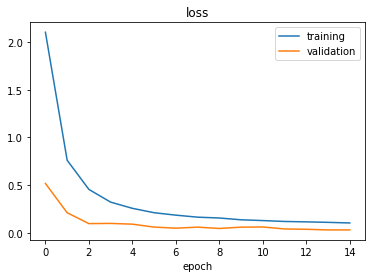

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

plt.show()

Text(0.5, 0, 'epoch')

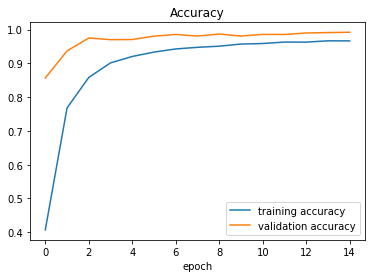

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
Score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Score : ", Score[0])
print("Test Accuracy : ", Score[1])

Test Score :  0.11715575307607651
Test Accuracy :  0.9677751660346985


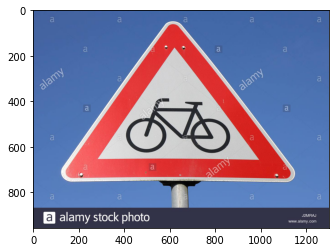

In [ ]:
# fetch image
import requests
from PIL import Image

# 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
# 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'  "wrongprediction"
# 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
# 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg' "wrongprediction"
#'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
url='https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))

Now testing some random images from the internet.

(32, 32)


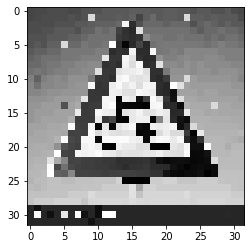

In [ ]:

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)



In [ ]:
# resize image 
img = img.reshape(1, 32, 32, 1)

predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)
# prediction
print("predicted sign class belongs to: " + str(classes_x))

predicted sign class belongs to: [30]


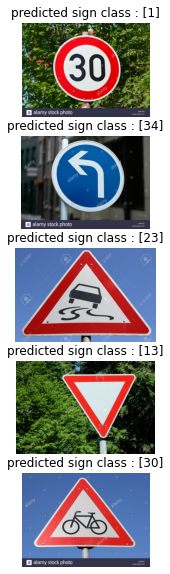

In [ ]:
# code to predict and run multiple urls:
urls = []
urls=['https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg',
      'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg',  
      'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg',
      'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg',
      'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg']
fig, axs = plt.subplots(nrows=len(urls), ncols=1, figsize=(10,10))
for i in range(len(urls)):
  response = requests.get(urls[i], stream=True)
  img = Image.open(response.raw)
  axs[i].imshow(img, cmap = plt.get_cmap('gray'))
  axs[i].axis('off')
  img = np.asarray(img)
  img = cv2.resize(img, (32, 32))
  img = preprocessing(img)
  img = img.reshape(1, 32, 32, 1)
  predict_x=model.predict(img)
  classes_x=np.argmax(predict_x,axis=1)
  axs[i].set_title("predicted sign class : " + str(classes_x))
